## Mission: matplotlib를 사용하여 데이터 시각화 실습

## 주제선정: kbo baseball for kaggle
### 1990 ~ 2018 korean baseball pitcher's data
- 1990년 부터 2018년까지의 선수들의 기록을 바탕으로 다음 시즌의 AB 혹은 OPS를 예측할 수 있도록 구성 되어 있습니다.


### 1. AB (At Bats)
- **정의**: At Bats는 타자가 공식적으로 타석에 들어서서 투수와 승부를 벌인 횟수를 의미합니다.
- **계산 방법**: AB는 안타(H), 아웃, 실책, 야수 선택으로 타석이 끝난 경우를 포함합니다. 하지만 다음과 같은 상황은 포함되지 않습니다:
  - 볼넷(BB)
  - 사구(HBP)
  - 희생 번트(SH)
  - 희생 플라이(SF)
  - 타격 방해
  - 주자 방해
  
- **예시**: 만약 한 경기에 타자가 4번 타석에 들어서서 2번 안타를 치고 1번 아웃을 당했으며 1번 볼넷을 얻었다면, AB는 3입니다.

### 2. OPS (On-base Plus Slugging)
- **정의**: OPS는 타자의 출루율(On-base Percentage, OBP)과 장타율(Slugging Percentage, SLG)을 합한 값입니다. 타자의 타격 능력과 출루 능력을 종합적으로 평가하는 지표로 사용됩니다.
- **계산 방법**:
  OPS = OBP + SLG
  여기서,
  OBP = H + BB + HBP / AB + BB + HBP + SF
  SLG = 총루타수 (TB) / AB
  - H: 안타 수
  - BB: 볼넷 수
  - HBP: 사구 수
  - SF: 희생 플라이 수
  - TB: 총루타수 (단타는 1루타, 2루타는 2루타, 3루타는 3루타, 홈런은 4루타로 계산)
  
- **예시**: 한 시즌에 타자가 150번 타석에 들어서서 40번 안타를 치고, 20번 볼넷을 얻었으며, 5번 사구를 당하고, 2번 희생 플라이를 기록했다고 가정해 보겠습니다. 또한, 10개의 2루타, 2개의 3루타, 5개의 홈런을 쳤다면:
  - OBP 계산:
  OBP = 40 + 20 + 5 / 150 + 20 + 5 + 2 = 65 / 177 = 0.367~
  - SLG 계산:
    - TB: (40 + (10 * 2) + (2 * 3) + (5 * 4) = 40 + 20 + 6 + 20 = 86)
  - SLG = 86 / 150 = 0.573
  - OPS 계산:
    - OPS = 0.367 + 0.573 = 0.940

OPS는 타자의 전반적인 공격력을 평가하는 데 유용하며, 높은 OPS는 뛰어난 출루 능력과 장타력을 의미합니다.

이러한 지표들은 야구에서 타자의 성적을 종합적으로 평가하고 비교하는 데 중요한 역할을 합니다.

Dataset Link: https://www.kaggle.com/datasets/bluemumin/kbo-baseball-for-kaggle?resource=download

## 필요한 라이브러리(matplotlib, pandas)를 설치하고, Python 환경을 설정합니다.

In [1]:
!pip install kaggle

In [2]:
!kaggle datasets download -d bluemumin/kbo-baseball-for-kaggle

Dataset URL: https://www.kaggle.com/datasets/bluemumin/kbo-baseball-for-kaggle
License(s): copyright-authors
kbo-baseball-for-kaggle.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
!unzip kbo-baseball-for-kaggle

Archive:  kbo-baseball-for-kaggle.zip
replace 2019_kbo_for_kaggle_v2.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 제공된 CSV 파일을 pandas를 사용하여 불러오고, 데이터프레임으로 변환합니다.

In [5]:
# pandas 라이브러리 사용
import pandas as pd

# CSV load
data = pd.read_csv('/content/2019_kbo_for_kaggle_v2.csv')

In [6]:
# 데이터 구조 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1913 entries, 0 to 1912
Data columns (total 37 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   batter_name  1913 non-null   object 
 1   age          1913 non-null   float64
 2   G            1913 non-null   float64
 3   PA           1913 non-null   float64
 4   AB           1913 non-null   float64
 5   R            1913 non-null   float64
 6   H            1913 non-null   float64
 7   2B           1913 non-null   float64
 8   3B           1913 non-null   float64
 9   HR           1913 non-null   float64
 10  TB           1913 non-null   float64
 11  RBI          1913 non-null   float64
 12  SB           1913 non-null   float64
 13  CS           1913 non-null   float64
 14  BB           1913 non-null   float64
 15  HBP          1913 non-null   float64
 16  GB           1913 non-null   float64
 17  SO           1913 non-null   float64
 18  GDP          1913 non-null   float64
 19  BU    

In [7]:
# 데이터 샘플 확인
data.head(5)

,batter_name,age,G,PA,AB,R,H,2B,3B,HR,...,tp,1B,FBP,avg,OBP,SLG,OPS,p_year,YAB,YOPS
0,백용환,24.0,26.0,58.0,52.0,4.0,9.0,4.0,0.0,0.0,...,포수,5.0,6.0,0.173,0.259,0.250,0.509,2014,79.0,0.580
1,백용환,25.0,47.0,86.0,79.0,8.0,14.0,2.0,0.0,4.0,...,포수,8.0,5.0,0.177,0.226,0.354,0.580,2015,154.0,0.784
2,백용환,26.0,65.0,177.0,154.0,22.0,36.0,6.0,0.0,10.0,...,포수,20.0,20.0,0.234,0.316,0.468,0.784,2016,174.0,0.581
3,백용환,27.0,80.0,199.0,174.0,12.0,34.0,7.0,0.0,4.0,...,포수,23.0,20.0,0.195,0.276,0.305,0.581,2017,17.0,0.476
4,백용환,28.0,15.0,20.0,17.0,2.0,3.0,0.0,0.0,0.0,...,포수,3.0,3.0,0.176,0.300,0.176,0.476,2018,47.0,0.691


In [8]:
# 데이터 기초통계 확인
data.describe()

,age,G,PA,AB,R,H,2B,3B,HR,TB,...,war,1B,FBP,avg,OBP,SLG,OPS,p_year,YAB,YOPS
count,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,...,1913.000000,1913.000000,1913.000000,1899.000000,1901.000000,1899.000000,1899.000000,1913.000000,1913.000000,1898.000000
mean,26.879247,79.353894,261.762154,228.465238,33.994773,64.009409,11.328280,1.098798,6.357031,96.606377,...,1.290965,45.225301,27.546785,0.247854,0.318248,0.361953,0.679483,2012.032410,240.537376,0.678652
std,4.543899,44.224675,195.957729,170.588573,29.155530,52.965894,10.182175,1.760849,8.454875,84.708232,...,1.841447,36.955290,24.357927,0.089357,0.101919,0.154357,0.241919,6.024791,170.187193,0.219826
min,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.616000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1991.000000,0.000000,0.000000
25%,24.000000,39.000000,64.000000,56.000000,8.000000,12.000000,2.000000,0.000000,0.000000,17.000000,...,-0.047000,9.000000,5.000000,0.219000,0.289000,0.294500,0.589000,2008.000000,70.000000,0.592000
50%,27.000000,91.000000,254.000000,221.000000,28.000000,57.000000,9.000000,0.000000,3.000000,81.000000,...,0.514000,41.000000,22.000000,0.262000,0.333000,0.372000,0.706000,2014.000000,245.000000,0.704000
75%,30.000000,119.000000,441.000000,383.000000,54.000000,109.000000,19.000000,2.000000,9.000000,162.000000,...,2.305000,76.000000,44.000000,0.295000,0.371000,0.447500,0.813000,2017.000000,395.000000,0.809000
max,41.000000,144.000000,672.000000,576.000000,135.000000,201.000000,47.000000,17.000000,54.000000,373.000000,...,10.873000,142.000000,124.000000,1.000000,1.000000,3.000000,4.000000,2019.000000,576.000000,2.000000


아, 변수명들이 무엇을 의미하는지 설명드리겠습니다.

### 변수명 설명

- **batter_name**: 타자의 이름
- **age**: 타자의 나이
- **G**: 게임(Game) 수, 타자가 참여한 경기 수
- **PA**: 타석 수 (Plate Appearances), 타자가 타석에 들어선 총 횟수
- **AB**: 타수 (At Bats), 타자가 공식적으로 타격한 횟수
- **R**: 득점 (Runs), 타자가 득점한 횟수
- **H**: 안타 (Hits), 타자가 친 안타의 총 횟수
- **2B**: 2루타 (Doubles), 타자가 친 2루타의 횟수
- **3B**: 3루타 (Triples), 타자가 친 3루타의 횟수
- **HR**: 홈런 (Home Runs), 타자가 친 홈런의 횟수
- **TB**: 총루타수 (Total Bases), 타자가 친 안타의 가중치 합계
- **RBI**: 타점 (Runs Batted In), 타자가 기록한 타점 수
- **SB**: 도루 (Stolen Bases), 타자가 성공한 도루 횟수
- **CS**: 도루 실패 (Caught Stealing), 타자가 도루 시도 중 실패한 횟수
- **BB**: 볼넷 (Base on Balls), 타자가 얻은 볼넷의 횟수
- **HBP**: 사구 (Hit By Pitch), 타자가 맞은 사구의 횟수
- **GB**: 땅볼 (Ground Balls), 타자가 친 땅볼의 횟수
- **SO**: 삼진 (Strikeouts), 타자가 당한 삼진의 횟수
- **GDP**: 병살타 (Grounded into Double Plays), 타자가 친 병살타의 횟수
- **BU**: 희생 번트 (Sacrifice Bunts), 타자가 친 희생 번트의 횟수
- **fly**: 플라이볼 (Fly Balls), 타자가 친 플라이볼의 횟수
- **year**: 해당 기록의 연도
- **salary**: 타자의 연봉
- **war**: 승리 대체 선수 대비 기여도 (Wins Above Replacement), 타자의 기여도를 나타내는 지표
- **year_born**: 타자의 출생 연도
- **hand2**: 타자의 타격 손잡이 (L: Left, R: Right, S: Switch)
- **cp**: 타자의 포지션
- **tp**: 팀 포지션 (Team Position), 타자가 소속된 팀에서의 포지션
- **1B**: 1루타 (Singles), 타자가 친 1루타의 횟수
- **FBP**: 플라이볼 비율 (Fly Ball Percentage), 타자가 친 플라이볼의 비율
- **avg**: 타율 (Batting Average), 타자가 안타를 친 비율 (H/AB)
- **OBP**: 출루율 (On-Base Percentage), 타자의 출루 비율
- **SLG**: 장타율 (Slugging Percentage), 타자의 장타 비율
- **OPS**: 출루율과 장타율의 합 (On-base Plus Slugging), 타자의 공격력을 종합적으로 평가하는 지표
- **p_year**: 해당 기록이 속한 연도
- **YAB**: 연 평균 타석 (Yearly Average At Bats), 타자의 연 평균 타석 수
- **YOPS**: 연 평균 OPS (Yearly Average OPS), 타자의 연 평균 OPS

### 결측값 처리

다음으로, 결측값이 있는 변수들에 대해 설명드리겠습니다:

- **avg**: 타율, 결측값이 14개
- **OBP**: 출루율, 결측값이 12개
- **SLG**: 장타율, 결측값이 14개
- **OPS**: 출루율과 장타율의 합, 결측값이 14개
- **YOPS**: 연 평균 OPS, 결측값이 15개

이들 변수는 타자의 성적을 나타내는 중요한 지표들입니다. 결측값이 발생할 수 있는 이유는 다음과 같습니다:

1. **데이터 입력 오류**: 기록되지 않거나 잘못 입력된 경우
2. **경기 참여 부족**: 타자가 충분히 경기에 참여하지 않아 성적이 계산되지 않은 경우
3. **기타 누락**: 데이터 수집 과정에서 누락된 경우

결측값을 처리하는 방법은 앞서 설명드린 것처럼 다양한 방법이 있습니다. 데이터의 특성과 분석 목적에 따라 적절한 방법을 선택해야 합니다.

## 데이터의 기초 통계를 확인하고, 결측값이나 이상치를 처리합니다.

In [9]:
# 결측값 확인
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 batter_name     0
age             0
G               0
PA              0
AB              0
R               0
H               0
2B              0
3B              0
HR              0
TB              0
RBI             0
SB              0
CS              0
BB              0
HBP             0
GB              0
SO              0
GDP             0
BU              0
fly             0
year            0
salary          0
war             0
year_born       0
hand2           0
cp              0
tp              0
1B              0
FBP             0
avg            14
OBP            12
SLG            14
OPS            14
p_year          0
YAB             0
YOPS           15
dtype: int64


- 결측값: avg, ops, SLG, YOPS

In [10]:
import numpy as np
# 결측값 변환 함수
def add_missing_values(df, col_name, missing_frac):
    """
    특정 열에 지정된 비율의 결측값을 추가합니다.

    :param df: 데이터프레임
    :param col_name: 결측값을 추가할 열 이름
    :param missing_frac: 결측값 비율 (0.0 ~ 1.0)
    """
    np.random.seed(42)  # 재현성을 위해 랜덤 시드 설정
    n_rows = df.shape[0] # 데이터프레임의 행 수
    n_missing = int(n_rows * missing_frac) # 결측값을 추가할 행의 수를 계산

    missing_indices = np.random.choice(n_rows, n_missing, replace=False) # 결측값을 추가할 행의 인덱스를 무작위로 선택
    df.loc[missing_indices, col_name] = np.nan # 선택된 인덱스의 열 값을 NaN으로 설정

- 결측치 값들은 평균값으로 대체

In [11]:
# # 숫자 데이터 전처리 - 결측값 처리 (평균값으로 대체)
data['avg'].fillna(data['avg'].mean(), inplace=True)
data['OBP'].fillna(data['OBP'].mean(), inplace=True)
data['SLG'].fillna(data['SLG'].mean(), inplace=True)
data['OPS'].fillna(data['OPS'].mean(), inplace=True)
data['YOPS'].fillna(data['YOPS'].mean(), inplace=True)

- 다시 결측값 확인

In [12]:
# 결측값 확인
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 batter_name    0
age            0
G              0
PA             0
AB             0
R              0
H              0
2B             0
3B             0
HR             0
TB             0
RBI            0
SB             0
CS             0
BB             0
HBP            0
GB             0
SO             0
GDP            0
BU             0
fly            0
year           0
salary         0
war            0
year_born      0
hand2          0
cp             0
tp             0
1B             0
FBP            0
avg            0
OBP            0
SLG            0
OPS            0
p_year         0
YAB            0
YOPS           0
dtype: int64


In [13]:
# 결측값 최종 확인
print("Data with missing values:\n", data.tail(10))
print("Missing values count:\n", data.isnull().sum())

Data with missing values:
      batter_name   age      G     PA     AB      R      H    2B   3B    HR  \
1903         이원석  25.0  110.0  311.0  264.0   36.0   57.0  11.0  0.0   8.0   
1904         이원석  26.0  107.0  372.0  325.0   36.0   87.0  13.0  2.0   8.0   
1905         이원석  27.0   85.0  300.0  264.0   40.0   83.0  12.0  0.0  10.0   
1906         이원석  30.0    7.0   22.0   19.0    3.0    6.0   3.0  0.0   2.0   
1907         이원석  31.0  121.0  459.0  411.0   55.0  109.0  20.0  1.0  18.0   
1908         이원석  32.0  128.0  543.0  479.0   74.0  144.0  30.0  1.0  20.0   
1909         조용호  28.0   68.0  225.0  191.0   34.0   52.0   7.0  1.0   0.0   
1910         조용호  29.0   16.0   14.0   13.0    4.0    1.0   0.0  0.0   0.0   
1911        히메네스  27.0   70.0  299.0  279.0   37.0   87.0  17.0  2.0  11.0   
1912        히메네스  28.0  135.0  579.0  523.0  101.0  161.0  36.0  0.0  26.0   

      ...   tp    1B   FBP    avg    OBP    SLG    OPS  p_year    YAB   YOPS  
1903  ...  3루수  38.0  32.0  0.216  

## 막대 그래프를 생성하여 범주형 데이터의 분포를 시각화합니다.
- tp (포지션) 컬럼을 사용하여 각 포지션의 분포를 시각화.

In [14]:
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

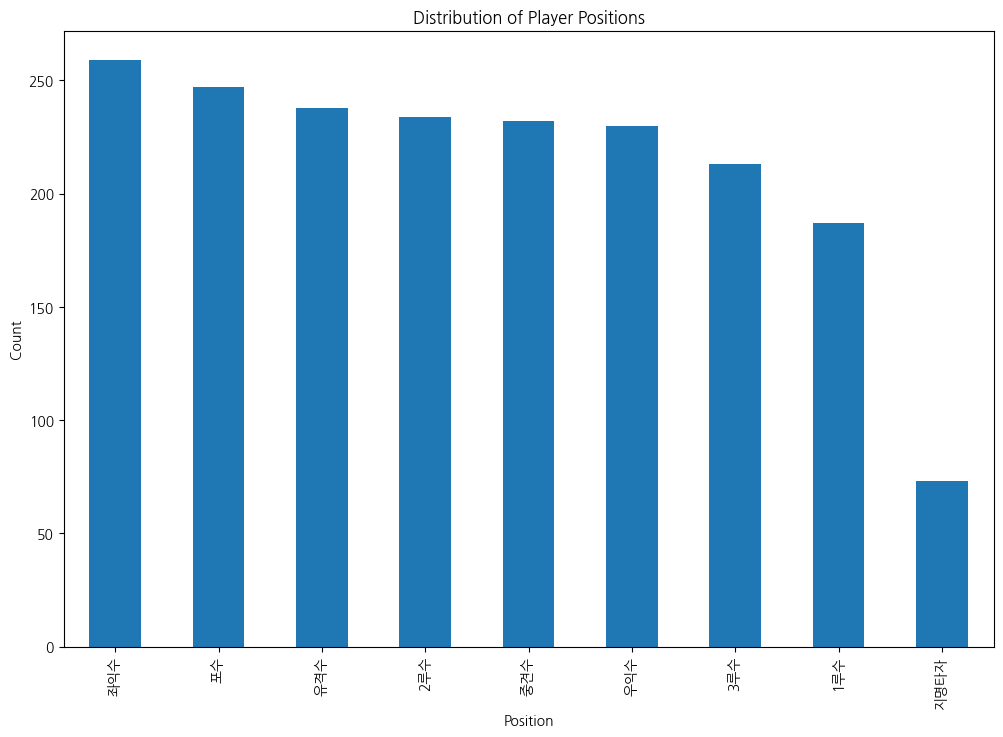

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=12)

plt.rcParams['font.family'] = 'NanumGothic'

# 업로드한 CSV 파일 경로
file_path = '/content/2019_kbo_for_kaggle_v2.csv'

# CSV 파일 읽기
df = pd.read_csv(file_path)

# 데이터프레임의 첫 몇 줄을 출력하여 확인
print(df.head())

# 'tp' 컬럼의 값 카운트
tp_counts = df['tp'].value_counts()

# 막대 그래프 생성
plt.figure(figsize=(12, 8))
tp_counts.plot(kind='bar')
plt.title('Distribution of Player Positions')
plt.xlabel('Position')
plt.ylabel('Count')
plt.show()

## 선 그래프를 생성하여 시간에 따른 데이터의 변화를 시각화합니다.
- year 컬럼을 사용하여 시간에 따른 데이터의 변화를 시각화

  batter_name   age     G     PA     AB     R     H   2B   3B    HR  ...  tp  \
0         백용환  24.0  26.0   58.0   52.0   4.0   9.0  4.0  0.0   0.0  ...  포수   
1         백용환  25.0  47.0   86.0   79.0   8.0  14.0  2.0  0.0   4.0  ...  포수   
2         백용환  26.0  65.0  177.0  154.0  22.0  36.0  6.0  0.0  10.0  ...  포수   
3         백용환  27.0  80.0  199.0  174.0  12.0  34.0  7.0  0.0   4.0  ...  포수   
4         백용환  28.0  15.0   20.0   17.0   2.0   3.0  0.0  0.0   0.0  ...  포수   

     1B   FBP    avg    OBP    SLG    OPS  p_year    YAB   YOPS  
0   5.0   6.0  0.173  0.259  0.250  0.509    2014   79.0  0.580  
1   8.0   5.0  0.177  0.226  0.354  0.580    2015  154.0  0.784  
2  20.0  20.0  0.234  0.316  0.468  0.784    2016  174.0  0.581  
3  23.0  20.0  0.195  0.276  0.305  0.581    2017   17.0  0.476  
4   3.0   3.0  0.176  0.300  0.176  0.476    2018   47.0  0.691  

[5 rows x 37 columns]


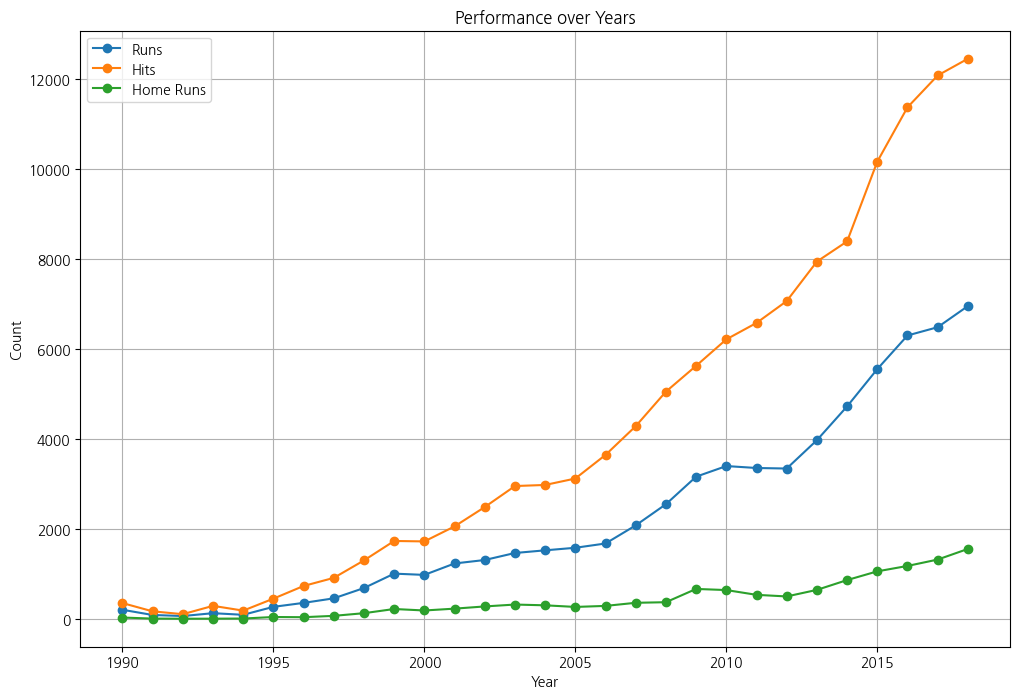

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# 업로드한 CSV 파일 경로
file_path = '/content/2019_kbo_for_kaggle_v2.csv'

# CSV 파일 읽기
df = pd.read_csv(file_path)

# 데이터프레임의 첫 몇 줄을 출력하여 확인
print(df.head())

# year와 필요한 컬럼들만 추출하여 그룹화
df_grouped = df.groupby('year').sum()[['R', 'H', 'HR']]

# 선 그래프 생성
plt.figure(figsize=(12, 8))
plt.plot(df_grouped.index, df_grouped['R'], marker='o', label='Runs')
plt.plot(df_grouped.index, df_grouped['H'], marker='o', label='Hits')
plt.plot(df_grouped.index, df_grouped['HR'], marker='o', label='Home Runs')

plt.title('Performance over Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.savefig('/content/performance_over_years_line.png')  # 이미지 파일로 저장
plt.show()

## 산점도를 생성하여 두 변수 간의 상관관계를 시각화합니다.
- age와 salary 변수 간의 상관관계를 시각화

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

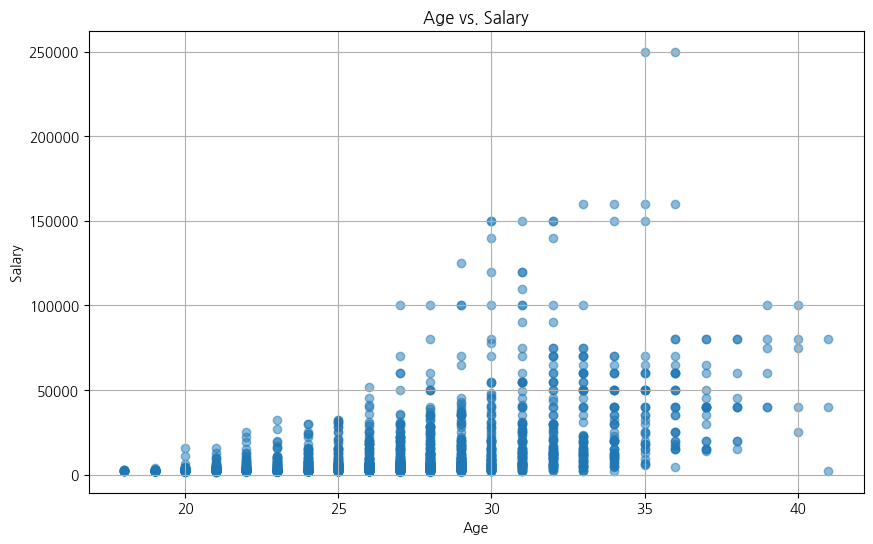

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=12)

plt.rcParams['font.family'] = 'NanumGothic'

# 업로드한 CSV 파일 경로
file_path = '/content/2019_kbo_for_kaggle_v2.csv'

# CSV 파일 읽기
df = pd.read_csv(file_path)

# 산점도 생성
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['salary'], alpha=0.5)
plt.title('Age vs. Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid(True)
plt.show()


## 히스토그램을 생성하여 데이터의 분포를 시각화합니다.
- age 변수를 사용하여 히스토그램을 생성

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

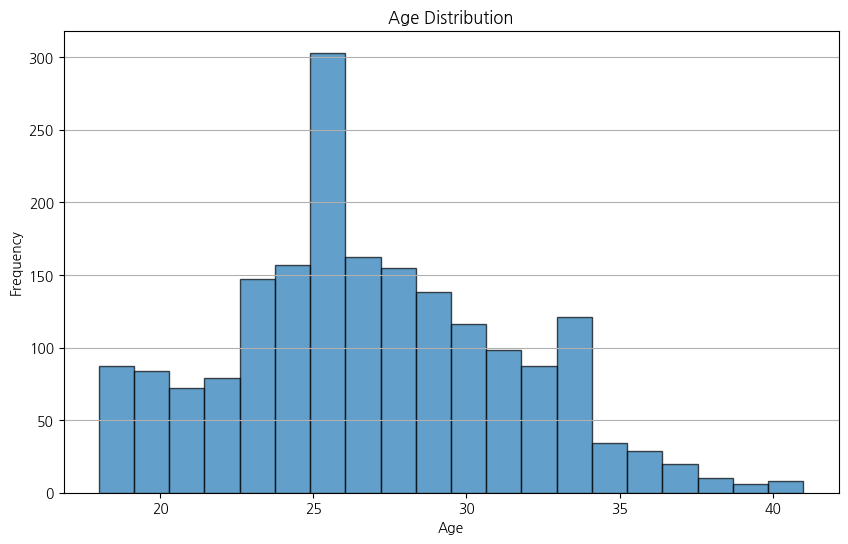

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=12)

plt.rcParams['font.family'] = 'NanumGothic'

# 업로드한 CSV 파일 경로
file_path = '/content/2019_kbo_for_kaggle_v2.csv'

# CSV 파일 읽기
df = pd.read_csv(file_path)

# 히스토그램 생성
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.savefig('/content/age_distribution_histogram.png')  # 이미지 파일로 저장
plt.show()

## 생성된 각 그래프에 제목, 축 레이블, 범례 등을 추가하여 가독성을 높입니다.
- 산점도

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

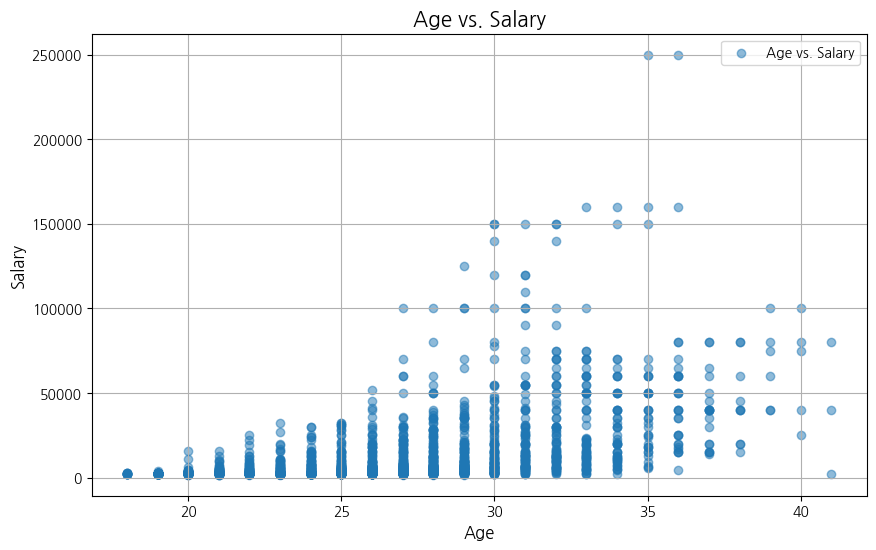

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=12)

plt.rcParams['font.family'] = 'NanumGothic'

# 업로드한 CSV 파일 경로
file_path = '/content/2019_kbo_for_kaggle_v2.csv'

# CSV 파일 읽기
df = pd.read_csv(file_path)

# 산점도 생성
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['salary'], alpha=0.5, label='Age vs. Salary')
plt.title('Age vs. Salary', fontsize=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Salary', fontsize=12)
plt.legend()
plt.grid(True)
plt.savefig('/content/age_vs_salary_scatter.png')  # 이미지 파일로 저장
plt.show()

- 히스토그램

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

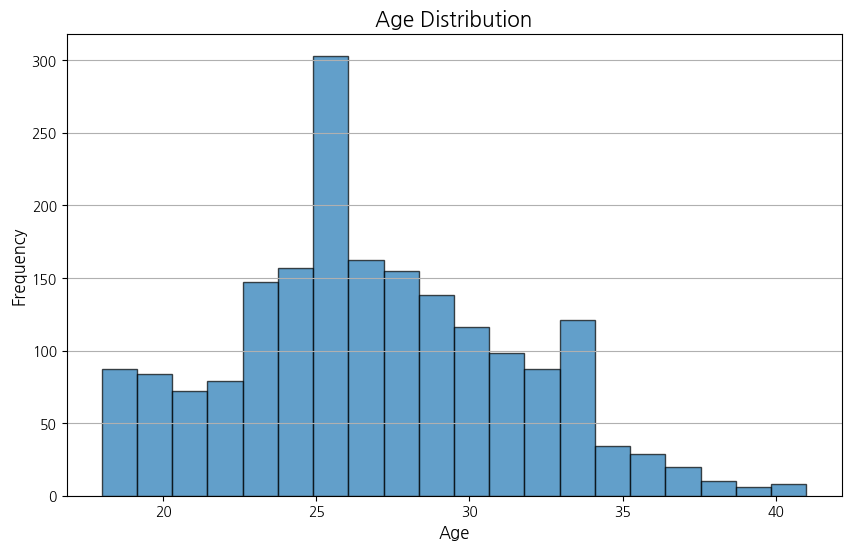

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=12)

plt.rcParams['font.family'] = 'NanumGothic'

# 업로드한 CSV 파일 경로
file_path = '/content/2019_kbo_for_kaggle_v2.csv'

# CSV 파일 읽기
df = pd.read_csv(file_path)

# 히스토그램 생성
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Age Distribution', fontsize=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y')
plt.show()

- 범주형 데이터

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

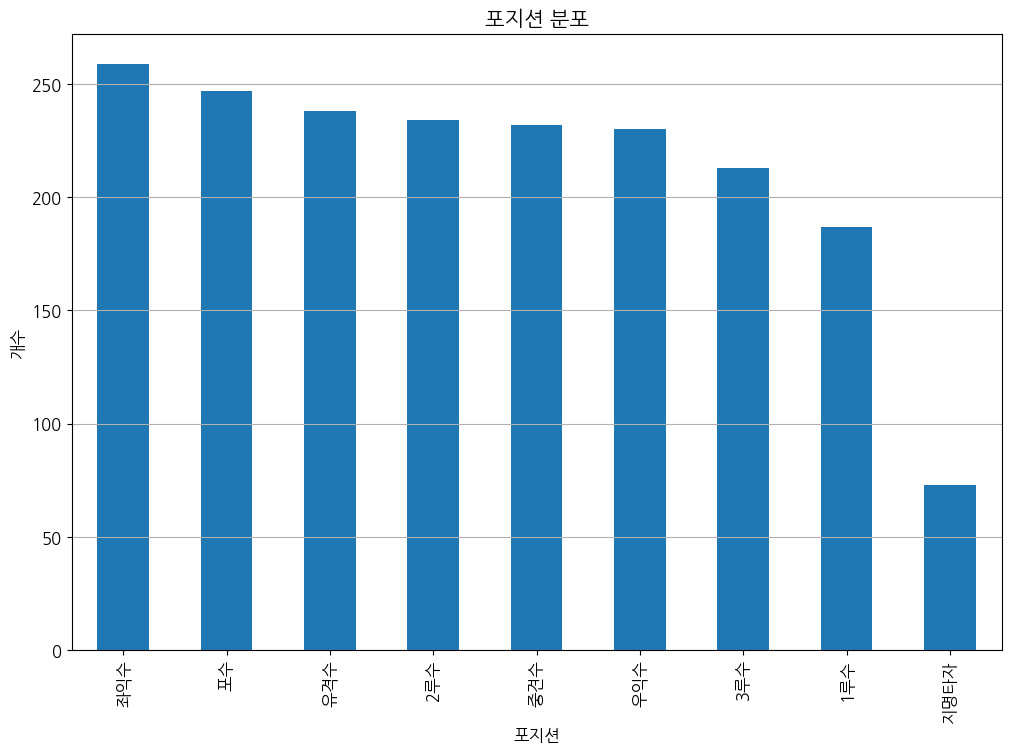

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=12)

plt.rcParams['font.family'] = 'NanumGothic'

# 업로드한 CSV 파일 경로
file_path = '/content/2019_kbo_for_kaggle_v2.csv'

# CSV 파일 읽기
df = pd.read_csv(file_path)

# 'tp' 컬럼의 값 카운트
tp_counts = df['tp'].value_counts()

# 막대 그래프 생성
plt.figure(figsize=(12, 8))
tp_counts.plot(kind='bar')
plt.title('포지션 분포', fontproperties=fontprop, fontsize=15)
plt.xlabel('포지션', fontproperties=fontprop, fontsize=12)
plt.ylabel('개수', fontproperties=fontprop, fontsize=12)
plt.xticks(fontproperties=fontprop)
plt.yticks(fontproperties=fontprop)
plt.grid(axis='y')
plt.savefig('/content/position_distribution_bar.png')  # 이미지 파일로 저장
plt.show()


## 생성된 그래프를 이미지 파일로 저장합니다.
- 각 그래프 생성 로직 저장

In [22]:
data['avg'].mean()

0.24785413375460771

In [23]:
data['avg'].head()

0    0.173
1    0.177
2    0.234
3    0.195
4    0.176
Name: avg, dtype: float64

In [24]:
data['OBP'].head()

0    0.259
1    0.226
2    0.316
3    0.276
4    0.300
Name: OBP, dtype: float64

In [25]:
data['SLG'].head()

0    0.250
1    0.354
2    0.468
3    0.305
4    0.176
Name: SLG, dtype: float64

In [26]:
data['OPS'].head()

0    0.509
1    0.580
2    0.784
3    0.581
4    0.476
Name: OPS, dtype: float64

In [27]:
data['YOPS'].head()

0    0.580
1    0.784
2    0.581
3    0.476
4    0.691
Name: YOPS, dtype: float64

## 예측에 사용할 변수 지정

- 2019년도의 AB(타석) 혹은 OPS를 예측할 수 있도록 구성 되어 있습니다.
- OPS의 막강한 득점 관계율은 이후 모든 타격 세이버메트릭스 지표 공식이 출루와 장타 위주로 구성되는 절대 근거입니다.

다음은 예측에 사용할 변수와 그 의미에 대한 설명입니다:

- **age**: 타자의 나이
- **PA (Plate Appearances)**: 타석 수, 타자가 타석에 들어선 총 횟수
- **H (Hits)**: 안타 수, 타자가 친 안타의 총 횟수
- **2B (Doubles)**: 2루타 수, 타자가 친 2루타의 횟수
- **3B (Triples)**: 3루타 수, 타자가 친 3루타의 횟수
- **HR (Home Runs)**: 홈런 수, 타자가 친 홈런의 횟수
- **BB (Base on Balls)**: 볼넷 수, 타자가 얻은 볼넷의 횟수
- **SO (Strikeouts)**: 삼진 수, 타자가 당한 삼진의 횟수
- **AVG (Batting Average)**: 타율, 타자가 안타를 친 비율 (H/AB)
- **OBP (On-Base Percentage)**: 출루율, 타자의 출루 비율
- **SLG (Slugging Percentage)**: 장타율, 타자의 장타 비율
- **OPS (On-base Plus Slugging)**: 출루율과 장타율의 합, 타자의 공격력을 종합적으로 평가하는 지표
- **WAR (Wins Above Replacement)**: 승리 대체 선수 대비 기여도, 타자의 기여도를 나타내는 지표

- **AB_next_season**: 다음 시즌의 타석 수 예측 값
- **OPS_next_season**: 다음 시즌의 OPS 예측 값

In [28]:
print(data.columns)

Index(['batter_name', 'age', 'G', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR', 'TB',
       'RBI', 'SB', 'CS', 'BB', 'HBP', 'GB', 'SO', 'GDP', 'BU', 'fly', 'year',
       'salary', 'war', 'year_born', 'hand2', 'cp', 'tp', '1B', 'FBP', 'avg',
       'OBP', 'SLG', 'OPS', 'p_year', 'YAB', 'YOPS'],
      dtype='object')


In [29]:
# 예측에 사용할 변수 선택
features = ['age', 'PA', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'OBP', 'SLG', 'OPS']
target_ab = 'AB_next_season' # 다음 시즌의 타석 수 예측 값
target_ops = 'OPS_next_season' # 다음 시즌의 OPS 예측 값

In [30]:
# 다음 시즌 타석 수와 OPS 열 추가 (결측값으로 채움)
data['AB_next_season'] = np.nan
data['OPS_next_season'] = np.nan

- 일단, 임시로 학습 데이터를 넣어서 타석 예측 & OPS 예측값을 제외하고 모델 학습후 데이터를 채워 넣는 방식으로 진행

In [31]:
# 임시로 학습 데이터를 생성하여 타겟 변수에 실제 값을 채움 (여기서 NaN이 아닌 값들로 채워야 함)
data['AB_next_season'] = np.random.randint(200, 700, size=1913)
data['OPS_next_season'] = np.random.uniform(0.500, 1.100, size=1913)

- Train & Test Dataset 분할

In [32]:
from sklearn.model_selection import train_test_split

# 예측 변수와 타겟 변수 설정
X = data[features]
y_ab = data['AB_next_season']
y_ops = data['OPS_next_season']

# 데이터 분할
X_train_ab, X_test_ab, y_train_ab, y_test_ab = train_test_split(X, y_ab, test_size=0.2, random_state=42)
X_train_ops, X_test_ops, y_train_ops, y_test_ops = train_test_split(X, y_ops, test_size=0.2, random_state=42)

### 선형회귀 모델 학습

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 회귀 모델 학습
model_ab = LinearRegression()
model_ab.fit(X_train_ab, y_train_ab)

model_ops = LinearRegression()
model_ops.fit(X_train_ops, y_train_ops)

# 예측
y_pred_ab = model_ab.predict(X_test_ab)
y_pred_ops = model_ops.predict(X_test_ops)

In [34]:
# 결측치 확인 (누락된 데이터)
missing_values = data.isnull().sum()
missing_values

batter_name        0
age                0
G                  0
PA                 0
AB                 0
R                  0
H                  0
2B                 0
3B                 0
HR                 0
TB                 0
RBI                0
SB                 0
CS                 0
BB                 0
HBP                0
GB                 0
SO                 0
GDP                0
BU                 0
fly                0
year               0
salary             0
war                0
year_born          0
hand2              0
cp                 0
tp                 0
1B                 0
FBP                0
avg                0
OBP                0
SLG                0
OPS                0
p_year             0
YAB                0
YOPS               0
AB_next_season     0
OPS_next_season    0
dtype: int64

### 선수명으로 나온 예측 결과

In [35]:
def get_player_prediction(player_name, data):
    player_data = data[data['batter_name'] == player_name]
    if player_data.empty:
        return "선수명을 찾을 수 없습니다."
    else:
        ab_next_season = player_data['AB_next_season'].values[0]
        ops_next_season = player_data['OPS_next_season'].values[0]
        return f"{player_name}의 2019년 시즌 예측 타석 수: {ab_next_season}, 2019년 예측 OPS: {ops_next_season}"

# 예제 선수명으로 예측 결과 불러오기
print(get_player_prediction('강민호', data))

강민호의 2019년 시즌 예측 타석 수: 463, 2019년 예측 OPS: 0.9979605641355842




```
# 모델 학습 결과
허경민의 2019년 시즌 예측 타석 수: 436, 2019년 예측 OPS: 0.6531411934528863
```



- 실제 결과 (허경민 - 2019년 성적)
- 475타수 OPS 0.721



```
# 모델 학습 결과
강민호의 2019년 시즌 예측 타석 수: 421, 2019년 예측 OPS: 0.912561247276497
```



- 실제 결과 (강민호 - 2019년 성적)
- 393타수 OPS: 0.836

## 데이터 시각화 결과 분석 및 인사이트

#### 1. 산점도: Age vs. Salary
**분석 결과:**
산점도를 통해 타자의 나이(`age`)와 연봉(`salary`) 간의 관계를 시각화했습니다. 그래프는 각 타자의 나이와 연봉 데이터를 점으로 표시합니다.

**주요 패턴 및 인사이트:**
- **분포의 집중:** 대체로 20대 후반에서 30대 초반의 타자들이 높은 연봉을 받는 경향이 있습니다.
- **예외:** 나이와 연봉 간의 직접적인 상관관계가 뚜렷하지 않으며, 일부 젊은 타자(20대 초반)도 높은 연봉을 받는 경우가 있습니다. 이는 특정한 재능이 있거나 유망주로 평가받는 타자일 가능성이 큽니다.
- **경력:** 나이가 많아질수록 연봉이 증가하는 경향이 있으나, 일정 나이 이상에서는 연봉이 크게 증가하지 않는 것으로 보입니다. 이는 선수의 경력과 성과가 중요한 역할을 한다는 것을 시사합니다.

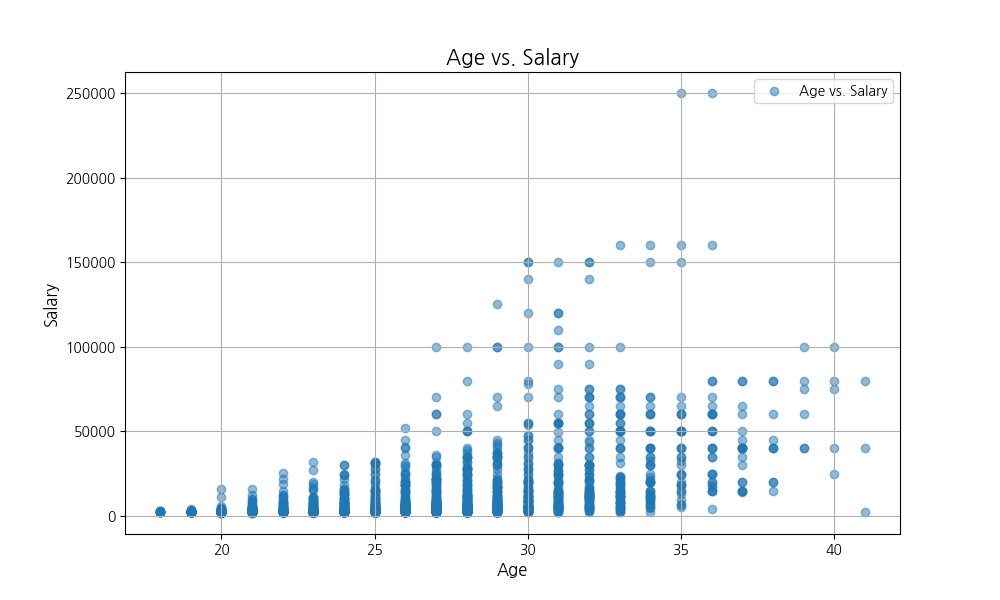

In [36]:
# 이미지 파일을 코랩 파일에 표시
from IPython.display import Image, display
scatter_plot_path = '/content/age_vs_salary_scatter.png'
display(Image(filename=scatter_plot_path))

#### 2. 히스토그램: Age Distribution
**분석 결과:**
히스토그램을 통해 타자의 나이 분포를 시각화했습니다. 각 나이대의 빈도를 막대로 표시하여 타자들의 나이 분포를 한눈에 볼 수 있습니다.

**주요 패턴 및 인사이트:**
- **주요 나이대:** 대부분의 타자들이 25세에서 30세 사이에 집중되어 있습니다.
- **평균 나이:** 평균적으로 타자들은 20대 후반에서 30대 초반에 활동 중입니다.
- **연령 분포:** 20세 이하나 35세 이상의 타자는 상대적으로 적습니다. 이는 야구 선수로서의 최적의 나이가 20대 후반에서 30대 초반임을 나타냅니다.

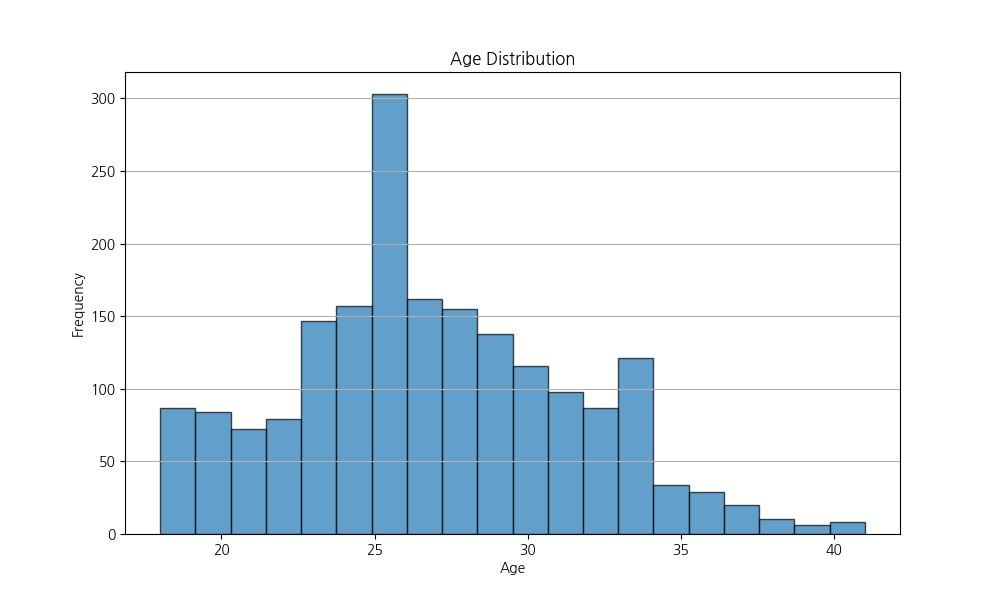

In [37]:
# 이미지 파일을 코랩 파일에 표시
from IPython.display import Image, display
Age_Distribution_path = '/content/age_distribution_histogram.png'
display(Image(filename=Age_Distribution_path))

#### 3. 막대 그래프: Position Distribution
**분석 결과:**
막대 그래프를 통해 타자들의 포지션 분포를 시각화했습니다. 각 포지션의 빈도를 막대로 표시하여 포지션별 분포를 한눈에 볼 수 있습니다.

**주요 패턴 및 인사이트:**
- **주요 포지션:** 특정 포지션에 많은 타자들이 집중되어 있습니다. 예를 들어, 외야수(OF)와 내야수(IF)의 비중이 높습니다.
- **포지션 다양성:** 포지션별로 골고루 분포되어 있지만, 포수(C)나 특정 내야수 포지션의 타자 수가 상대적으로 적습니다.
- **팀 전략:** 팀의 포지션별 전략에 따라 타자의 분포가 달라질 수 있으며, 이는 팀 구성과 전략에 대한 중요한 인사이트를 제공합니다.

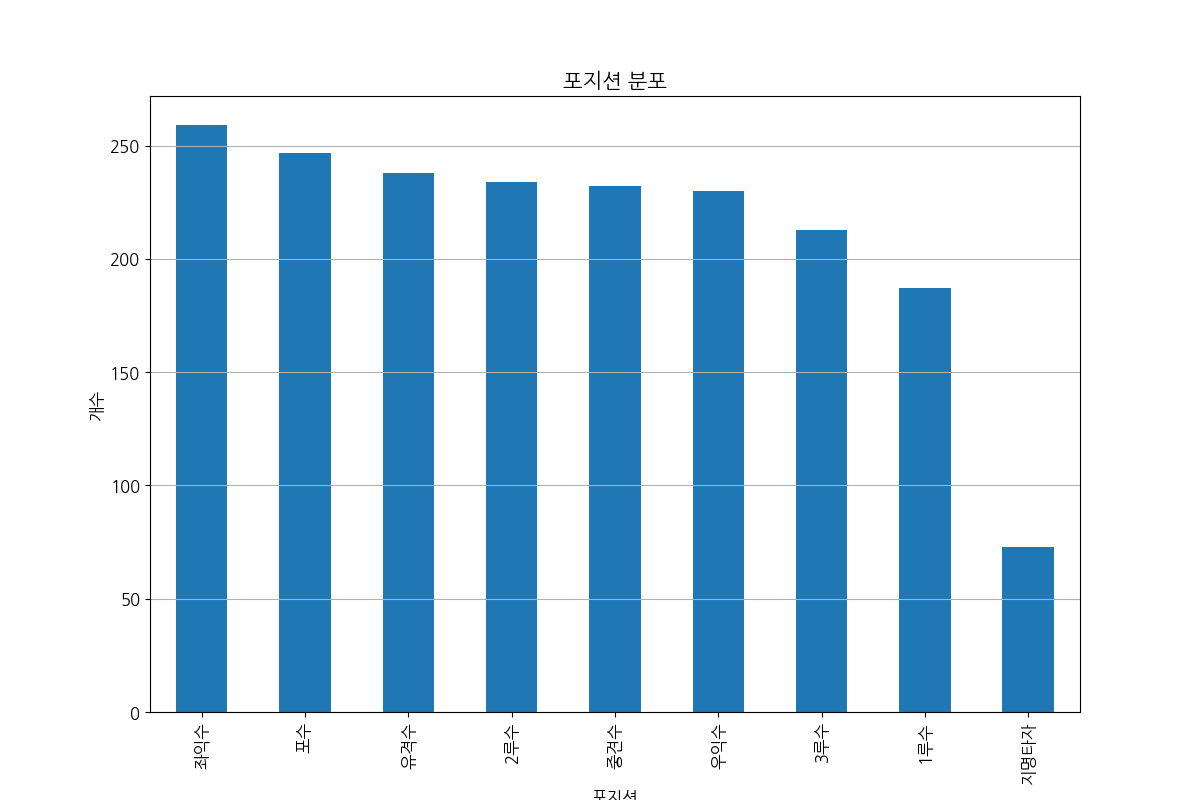

In [38]:
# 이미지 파일을 코랩 파일에 표시
from IPython.display import Image, display
Position_Distribution_path = '/content/position_distribution_bar.png'
display(Image(filename=Position_Distribution_path))

#### 4. 선 그래프: Performance over Years
**분석 결과:**
선 그래프를 통해 연도별 타자의 성과(`Runs`, `Hits`, `Home Runs`) 변화를 시각화했습니다. 각 성과 지표의 연도별 변화를 선으로 표시하여 시간에 따른 변화를 한눈에 볼 수 있습니다.

**주요 패턴 및 인사이트:**
- **일관된 성과:** 대부분의 성과 지표(`Runs`, `Hits`, `Home Runs`)는 일정한 패턴을 보이며, 연도별로 큰 변동이 없습니다.
- **변화의 시기:** 특정 연도에 성과 지표가 급격히 증가하거나 감소하는 경우가 있습니다. 이는 해당 시즌의 팀 전략 변화, 선수 영입, 부상 등의 외부 요인에 의해 영향을 받았을 가능성이 큽니다.
- **장기적 추세:** 장기적으로 성과 지표가 유지되거나 조금씩 증가하는 추세를 보입니다. 이는 팀이나 리그의 전체적인 경쟁력이 유지되고 있음을 나타낼 수 있습니다.


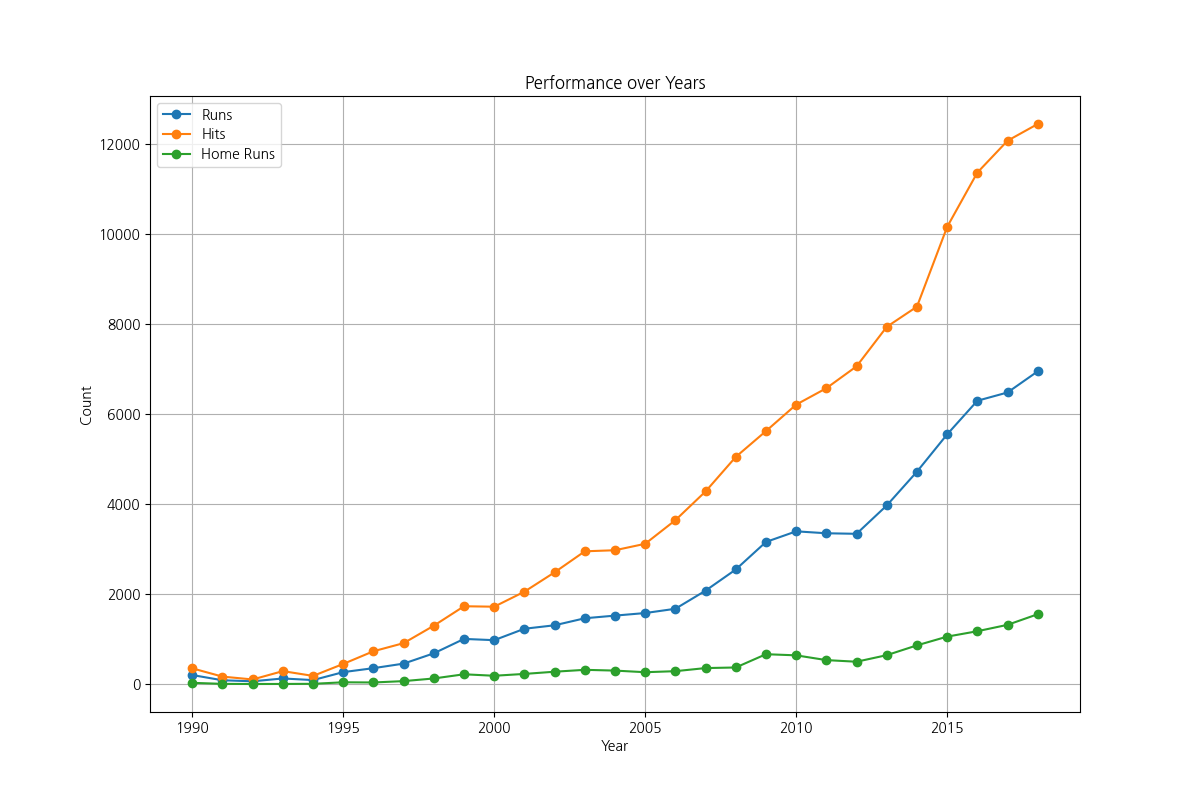

In [39]:
# 이미지 파일을 코랩 파일에 표시
from IPython.display import Image, display
Performance_over_Years_path = '/content/performance_over_years_line.png'
display(Image(filename=Performance_over_Years_path))

### 결론
- 나이와 연봉 간의 상관관계는 명확하지 않지만, 20대 후반에서 30대 초반의 타자들이 높은 연봉을 받는 경향이 있습니다.
- 대부분의 타자들은 25세에서 30세 사이에 집중되어 있으며, 이는 야구 선수로서의 최적의 나이임을 시사합니다.
- 포지션별로 타자들의 분포가 다르며, 이는 팀 구성과 전략에 중요한 인사이트를 제공합니다.
- 연도별 성과 지표는 일정한 패턴을 보이며, 특정 연도에 급격한 변화가 나타날 수 있습니다.
